In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [69]:
scores = []

In [70]:
#ah
scores.append([0.6666666666666667,
 0.788888888888889,
 0.625,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.375])

In [71]:
#da
scores.append([0.7142857142857142,
 0.8625,
 0.65,
 0.5277777777777777,
 0.8694444444444445,
 0.8416666666666666,
 0.7857142857142857,
 0.65,
 0.6339285714285714,
 0.6428571428571428])

In [72]:
#dnn
scores.append([0.5,
 0.5555555555555556,
 0.5,
 0.25,
 0.25,
 0.375,
 0.4444444444444445,
 0.375,
 0.25,
 0.375])

In [73]:
#esn
scores.append([0.8,
 0.4270833333333333,
 0.2666666666666667,
 0.4666666666666667,
 0.5729166666666667,
 0.5,
 0.5729166666666666,
 0.6,
 0.6125,
 0.6333333333333333])

In [74]:
#eva
scores.append([0.4166666666666667,
 0.33333333333333337,
 0.5,
 0.5,
 0.33333333333333337,
 0.6666666666666667,
 0.5,
 0.5,
 0.5,
 0.5])

In [75]:
#fd
scores.append([1.0,
 1.0,
 0.9583333333333334,
 1.0,
 0.5833333333333333,
 0.31666666666666665,
 0.33333333333333337,
 0.25,
 0.6666666666666667,
 0.775])

In [76]:
#fit
scores.append([0.75,
 0.8,
 0.6666666666666667,
 0.5555555555555556,
 0.5,
 0.375,
 0.33333333333333337,
 0.3333333333333333,
 0.4444444444444445,
 0.4])

In [77]:
#grg
scores.append([0.6733333333333333,
 0.92875,
 0.8,
 0.8214285714285714,
 0.6011904761904763,
 0.5,
 0.5219047619047619,
 0.56,
 0.5508333333333334,
 0.5857142857142856])

In [78]:
#kmh
scores.append([0.4520833333333333,
 0.8958333333333334,
 1.0,
 0.7333333333333334,
 0.5916666666666666,
 0.5669642857142857,
 0.625,
 0.625,
 0.5625,
 0.5333333333333333])

In [79]:
#mni
scores.append([0.5238095238095237,
 0.735,
 0.6458333333333335,
 0.47619047619047616,
 0.375,
 0.5565476190476191,
 0.5,
 0.4285714285714286,
 0.380952380952381,
 0.51])

In [80]:
#msf
scores.append([0.6666666666666667,
 0.65,
 0.6000000000000001,
 0.5,
 0.47500000000000003,
 0.5,
 0.5,
 0.45,
 0.45,
 0.5])

In [81]:
#mrl
scores.append([0.763888888888889,
 0.7,
 0.6583333333333334,
 0.3416666666666667,
 0.5,
 0.45,
 0.475,
 0.47500000000000003,
 0.475,
 0.5555555555555556])

In [82]:
#msf
scores.append([0.8666666666666667,
 0.5479166666666667,
 0.3125,
 0.33333333333333337,
 0.32291666666666663,
 0.2666666666666667,
 0.2,
 0.4330357142857143,
 0.4520833333333333,
 0.33333333333333337])

In [83]:
#nhm
scores.append([0.5,
 0.4,
 0.5833333333333333,
 0.5,
 0.5833333333333333,
 0.5833333333333334,
 0.4083333333333333,
 0.4583333333333333,
 0.41666666666666663,
 0.41666666666666663])

In [84]:
#rob
scores.append([0.6,
 0.5833333333333334,
 0.33333333333333337,
 0.5833333333333333,
 0.4583333333333333,
 0.41666666666666663,
 0.5,
 0.4,
 0.3,
 0.25])

In [85]:
#sby
scores.append([0.6455128205128206,
 0.8571428571428572,
 0.7396825396825397,
 0.609920634920635,
 0.5936507936507937,
 0.6431818181818182,
 0.5799715909090909,
 0.5197172619047619,
 0.521969696969697,
 0.5625])

In [86]:
#yng
scores.append([0.5,
 0.6666666666666666,
 0.6666666666666667,
 0.5,
 0.5,
 0.5,
 0.6666666666666666,
 0.5,
 0.3333333333333333,
 0.5])

In [87]:
#ysf
scores.append([0.5,
 0.5833333333333334,
 0.625,
 0.5333333333333333,
 0.4166666666666667,
 0.5,
 0.48333333333333334,
 0.5333333333333333,
 0.5833333333333334,
 0.5729166666666667])

In [88]:
scores_df = pd.DataFrame(
    data=scores, 
    columns=['7', '18', '30','40','60','70','90','100','110','120Hz'])

In [44]:
scores_df

,7,18,30,40,60,70,90,100,110,120Hz
0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.666667,0.500000,0.500000,0.833333
1,0.250000,0.500000,0.750000,0.250000,0.250000,0.500000,0.750000,0.250000,0.250000,0.250000
2,0.500000,0.444444,0.400000,0.750000,0.444444,0.500000,0.400000,0.500000,0.500000,0.500000
3,0.833333,0.500000,0.333333,0.500000,0.500000,0.500000,0.666667,0.666667,0.750000,0.750000
4,0.250000,0.416667,0.666667,0.666667,0.666667,0.750000,0.666667,0.666667,0.666667,0.666667
5,0.833333,1.000000,1.000000,1.000000,0.833333,0.750000,0.666667,0.500000,0.666667,0.666667
6,0.777778,0.500000,0.640000,0.555556,0.500000,0.422222,0.500000,0.500000,0.444444,0.527778
7,0.622024,0.959167,0.952381,0.761905,0.458095,0.438750,0.510000,0.560000,0.550833,0.640000
8,0.354167,0.875000,1.000000,0.516667,0.483333,0.500000,0.500000,0.466667,0.400000,0.452083
9,0.555556,0.800000,0.444444,0.500000,0.552778,0.563492,0.450000,0.500000,0.500000,0.571429


In [45]:
accuracies = []
freqs = []
for col in scores_df.columns:
    accuracies = np.concatenate((accuracies, scores_df[col].values))
    freqs += [col] * len(scores_df[col])
# print([accuracies,freqs])
scs = pd.DataFrame(data=list(zip(accuracies,freqs)), columns=['acc','freqs'])

C:\Users\Alberto\AppData\Local\Temp\ipykernel_12824\1047238202.py:9: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_val = scs[scs['freqs']==sample_name].median()[0]


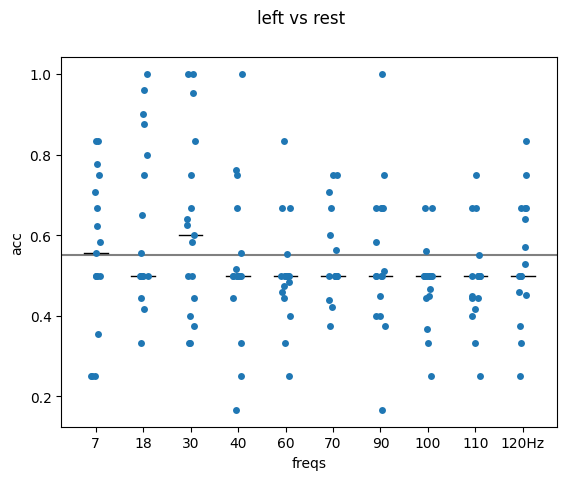

In [91]:
csp_fig, axes = plt.subplots(1)
csp_fig.suptitle('left vs rest')
axes.axhline(.55, c='grey')
sns.stripplot(y='acc', x='freqs', data=scs, ax=axes)
median_width= 0.5
for tick, text in zip(axes.get_xticks(), axes.get_xticklabels()):
    sample_name = text.get_text()  # "X" or "Y"
    # calculate the median value for all replicates of either X or Y
    median_val = scs[scs['freqs']==sample_name].median()[0]
    # plot horizontal lines across the column, centered on the tick
    axes.plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
            lw=1, color='k')

C:\Users\Alberto\AppData\Local\Temp\ipykernel_12824\4141325355.py:9: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_val = scs[scs['freqs']==sample_name].median()[0]


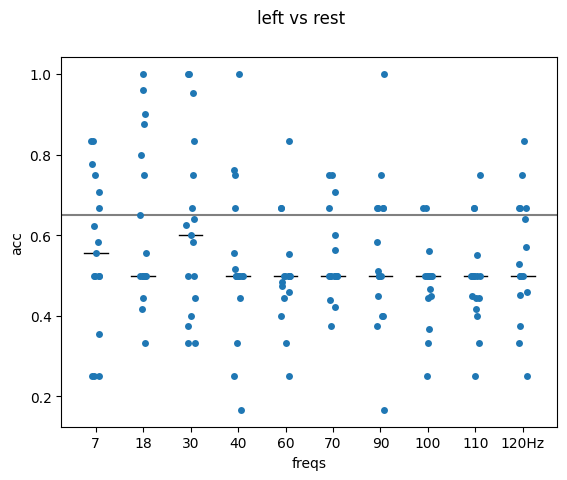

In [65]:
csp_fig, axes = plt.subplots(1)
csp_fig.suptitle('left vs rest')
axes.axhline(.65, c='grey')
sns.stripplot(y='acc', x='freqs', data=scs, ax=axes)
median_width= 0.5
for tick, text in zip(axes.get_xticks(), axes.get_xticklabels()):
    sample_name = text.get_text()  # "X" or "Y"
    # calculate the median value for all replicates of either X or Y
    median_val = scs[scs['freqs']==sample_name].median()[0]
    # plot horizontal lines across the column, centered on the tick
    axes.plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
            lw=1, color='k')

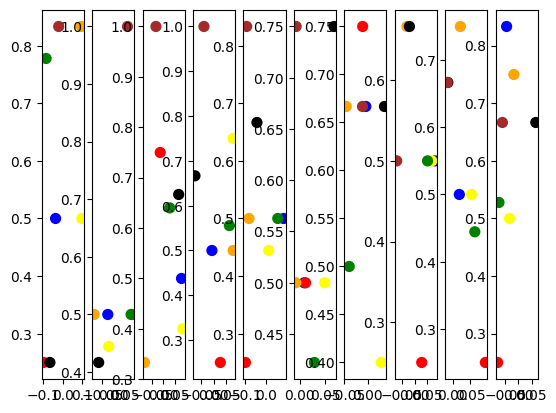

In [118]:
fig, axes = plt.subplots(ncols=10)
colors_d = {'a':'blue','b':'red','c':'yellow','d':'orange','e':'black','f':'brown','g':'green'}
colors = scores_df['participant'].map(colors_d)
for y_col, ax in zip(['7', '18', '30','40','60','70','90','100','110','120Hz'], axes):
    ax.scatter(x=np.random.uniform(-0.1, 0.1, len(scores_df)), y=scores_df[y_col],s=50, color=colors)
    ax.set_ylabel('')
    ax.set_xlabel('')
plt.show()

In [112]:
for y_col, ax in zip(['7', '18', '30','40','60','70','90','100','110','120Hz'], axes):
    ax.scatter(x=np.random.uniform(-0.2, 0.2, len(scores_df)), y=scores_df[y_col], color=colors)

In [113]:
plt.show()